# Bounding box detection - Racoon data


## Data files
- images_racoon.rar: contain images of racoons
- train_labels.cv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Change directory

In [25]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import csv
import numpy as np
import os
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

In [4]:
os.getcwd()

'/content'

In [5]:
os.chdir('/content/drive/MyDrive')

In [6]:
os.getcwd()

'/content/drive/MyDrive'

### Load the training data from train.csv file

In [7]:
train=pd.read_csv('train_labels.csv')

In [8]:
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127


### Print the shape of the train dataset

In [9]:
train.shape


(173, 8)

### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [10]:
IMAGE_SIZE=128

### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [11]:
coords=[]
paths=[]

for i,row in train.iterrows():
  path,width,height,class_,xmin,ymin,xmax,ymax =row

  xmin=xmin*IMAGE_SIZE/width
  ymin=ymin*IMAGE_SIZE/height
  xmax=xmax*IMAGE_SIZE/width
  ymax=ymax*IMAGE_SIZE/height

  coord=[xmin,ymin,xmax,ymax]
  coords.append(coord)
  paths.append(path)

In [12]:
coords=np.array(coords)

In [13]:
coords

array([[4.69498069e+01, 3.95876289e+01, 8.25328185e+01, 7.78556701e+01],
       [5.81818182e-01, 2.96296296e-01, 8.94060606e+01, 1.27703704e+02],
       [1.57866667e+01, 3.42400000e+01, 5.97333333e+01, 9.28000000e+01],
       [4.84266667e+01, 2.97600000e+01, 8.59733333e+01, 9.53600000e+01],
       [2.71941392e+01, 2.28324324e+01, 9.23663004e+01, 8.78702703e+01],
       [7.49268293e+00, 5.72357724e+00, 1.17385366e+02, 1.24878049e+02],
       [2.53866667e+01, 6.72000000e+00, 7.85066667e+01, 1.27680000e+02],
       [5.24750958e+01, 6.63212435e+00, 1.22114943e+02, 1.10093264e+02],
       [5.14056225e-01, 6.33663366e-01, 7.91646586e+01, 1.11524752e+02],
       [4.29961390e+01, 5.27835052e+00, 8.99459459e+01, 5.87216495e+01],
       [1.30957096e+01, 4.62650602e+00, 8.32211221e+01, 1.25686747e+02],
       [8.40154440e+00, 2.57319588e+01, 1.18115830e+02, 9.69896907e+01],
       [4.35200000e+00, 3.12320000e+01, 7.14240000e+01, 1.27744000e+02],
       [6.83333333e+00, 6.66666667e-01, 1.13833333e

In [14]:
coords.shape

(173, 4)

In [15]:
len(paths)

173

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [16]:
from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input
from PIL import Image

In [17]:
batch_images=np.zeros((len(paths),IMAGE_SIZE,IMAGE_SIZE,3),dtype=np.float32)

In [18]:
for i ,f in enumerate(paths):
  img=Image.open('images/'+f)
  img=img.resize((IMAGE_SIZE,IMAGE_SIZE))
  img=img.convert('RGB')
  batch_images[i]=preprocess_input(np.array(img,dtype=np.float32))
  

In [19]:
batch_images.shape

(173, 128, 128, 3)

imgage

In [20]:
import cv2
# Pick a random image to check how it looks
filename = paths[90]
print('images/'+filename)
unscaled1 = cv2.imread('images/'+filename)

images/raccoon-18.jpg


In [21]:
image_height, image_width, _ = unscaled1.shape
image = cv2.resize(unscaled1, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print ("Size of original input: ", unscaled1.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)

Size of original input:  (156, 240, 3)
-------------------------------
Size of scaled input:  (128, 128, 3)


In [22]:
region = coords[90]
image_height, image_width, _ = unscaled1.shape
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

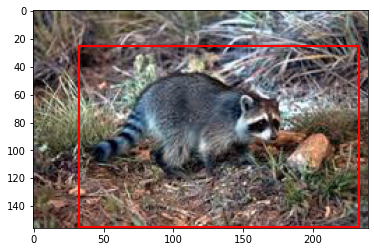

In [23]:
#train image is 
#viewing the train image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled1)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [26]:
#using csv reader to read the image
coords_1 = []
paths_1 = []
with open('train_labels.csv','r') as csvfile:
  read_1 = csv.reader(csvfile,delimiter=',')
  #csvfile.seek(0)
  next(read_1)

  for i,row in enumerate(read_1):
    #print(i,row)

    for j,ele in enumerate(row):
      #print (j,ele)
  
      if ((j!=0) & (j!=3)):
        row[j] = int(ele)


    xmin = row[4]*IMAGE_SIZE/row[1]
    xmax = row[-2]*IMAGE_SIZE/row[1]

    ymin = row[5]*IMAGE_SIZE/row[2]
    ymax = row[-1]*IMAGE_SIZE/row[2]

    coord = [xmin,ymin,xmax,ymax]
    coords_1.append(coord)
    paths.append(row[0])

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3. Freeze all the layers. Add convolution and reshape layers at the end to ensure the output is 4 coordinates

In [27]:
from tensorflow.keras.layers import Conv2D,Reshape
from tensorflow.keras import Model

In [28]:
model=MobileNet(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),include_top=False,alpha=1)

for layer in model.layers:
  layer.trainable=False

x=model.layers[-1].output
x=Conv2D(4,kernel_size=4)(x)
x=Reshape((4,))(x)

model=Model(inputs=model.input,outputs=x)

17227776/17225924 [==============================] - 0s 0us/step


In [29]:
#model summary is
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)        0     

### Define a custom loss function IoU which calculates Intersection Over Union

In [30]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.compat.v1.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [31]:
import tensorflow as tf

In [32]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=[IoU])

In [33]:
from tensorflow.keras.backend import epsilon

In [34]:
# Fit the model
model.fit(batch_images,coords, epochs=30, batch_size=32,verbose =1 )

Epoch 1/30
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
6/6 [==============================] - 4s 320ms/step - loss: 4903.8696 - IoU: 0.0570
Epoch 2/30
6/6 [==============================] - 2s 325ms/step - loss: 1032.7294 - IoU: 0.3612
Epoch 3/30
6/6 [==============================] - 2s 318ms/step - loss: 403.2109 - IoU: 0.5911
Epoch 4/30
6/6 [========================

### Pick a test image from the given data

In [35]:
import cv2
# Pick a random image to check how it looks
filename = paths[80]
print('images/'+filename)
img_unscaled2 = cv2.imread('images/'+filename)

images/raccoon-49.jpg


In [36]:
img_unscaled2.shape

(395, 640, 3)

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [37]:
#reszing the image
image_height, image_width, _ = unscaled1.shape
image = cv2.resize(unscaled1, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print ("Size of original input: ", img_unscaled2.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)

Size of original input:  (395, 640, 3)
-------------------------------
Size of scaled input:  (128, 128, 3)


### Predict the coordinates of the bounding box for the given test image

In [44]:
region = model.predict(x=np.array([feat_scaled]))[0] 

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

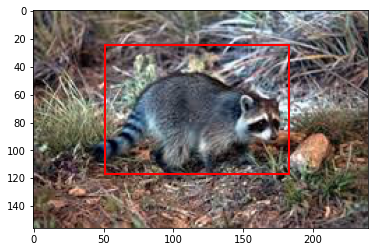

In [39]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[3]) * image_height / IMAGE_SIZE)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled1)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [40]:
import cv2
# Pick a random image to check how it looks
filename = paths[70]
print('images/'+filename)
img_unscaled3 = cv2.imread('images/'+filename)

images/raccoon-16.jpg


In [41]:
image_height, image_width, _ = img_unscaled3.shape
image = cv2.resize(img_unscaled3, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print ("Size of original input: ", img_unscaled3.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)

Size of original input:  (640, 424, 3)
-------------------------------
Size of scaled input:  (128, 128, 3)


In [42]:
region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox

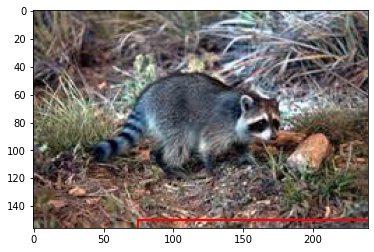

In [43]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[3]) * image_height / IMAGE_SIZE)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled1)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()